In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множестве транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [2]:
creditcard = pd.read_csv('creditcard.csv')
creditcard = creditcard.dropna()
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
creditcard_features = creditcard.drop(['Class'], axis=1)
creditcard_answers = creditcard['Class']
creditcard_features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [4]:
scaler = MinMaxScaler()
creditcard_features = scaler.fit_transform(creditcard_features)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [5]:
creditcard_features_train, creditcard_features_test, creditcard_answers_train, creditcard_answers_test = train_test_split(creditcard_features, creditcard_answers, random_state=17, test_size=0.1)
creditcard_features_train.shape, creditcard_features_test.shape

((256326, 30), (28481, 30))

#### Логистическая регрессия

Логистическая регрессия: accuracy = 0.9992275552122467, precision = 0.8709677419354839, recall = 0.6, f1_score = 0.7105263157894737


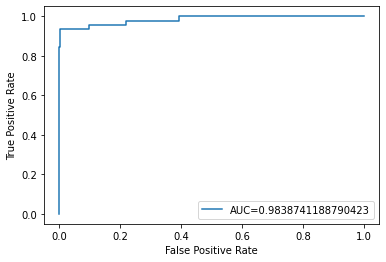

In [18]:
log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(creditcard_features_train, creditcard_answers_train)
creditcard_answers_predicted = log_regression.predict(creditcard_features_test)
creditcard_answers_proba = log_regression.predict_proba(creditcard_features_test)[:, 1]

accuracy = metrics.accuracy_score(creditcard_answers_test, creditcard_answers_predicted)
precision = metrics.precision_score(creditcard_answers_test, creditcard_answers_predicted)
recall = metrics.recall_score(creditcard_answers_test, creditcard_answers_predicted)
f_score = metrics.f1_score(creditcard_answers_test, creditcard_answers_predicted)

print(f'Логистическая регрессия: accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1_score = {f_score}')

fpr, tpr, _ = metrics.roc_curve(y_true=creditcard_answers_test, y_score=creditcard_answers_proba)
auc = metrics.roc_auc_score(y_true=creditcard_answers_test, y_score=creditcard_answers_proba)
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

KNN: accuracy = 0.9995435553526912, precision = 0.9444444444444444, recall = 0.7555555555555555, f1_score = 0.8395061728395062


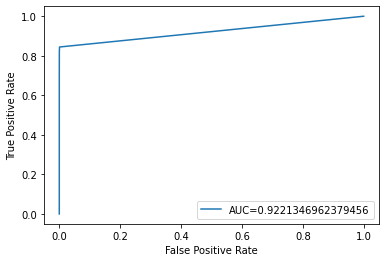

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(creditcard_features_train, creditcard_answers_train)
creditcard_answers_predicted = knn.predict(creditcard_features_test)
creditcard_answers_proba = knn.predict_proba(creditcard_features_test)[:, 1]

accuracy = metrics.accuracy_score(creditcard_answers_test, creditcard_answers_predicted)
precision = metrics.precision_score(creditcard_answers_test, creditcard_answers_predicted)
recall = metrics.recall_score(creditcard_answers_test, creditcard_answers_predicted)
f_score = metrics.f1_score(creditcard_answers_test, creditcard_answers_predicted)

print(f'KNN: accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1_score = {f_score}')

fpr, tpr, _ = metrics.roc_curve(y_true=creditcard_answers_test, y_score=creditcard_answers_proba)
auc = metrics.roc_auc_score(y_true=creditcard_answers_test, y_score=creditcard_answers_proba)
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

KNN: accuracy = 0.0015800007022225343, precision = 0.0015800007022225343, recall = 1.0, f1_score = 0.003155016476197153


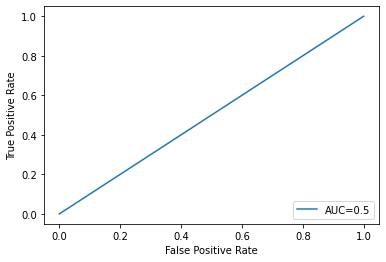

In [20]:
constant = 1
creditcard_answers_predicted = np.array([constant for _ in range(creditcard_answers_test.size)])
creditcard_answers_proba = np.array([1 for _ in range(creditcard_answers_test.size)])

accuracy = metrics.accuracy_score(creditcard_answers_test, creditcard_answers_predicted)
precision = metrics.precision_score(creditcard_answers_test, creditcard_answers_predicted)
recall = metrics.recall_score(creditcard_answers_test, creditcard_answers_predicted)
f_score = metrics.f1_score(creditcard_answers_test, creditcard_answers_predicted)

print(f'KNN: accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1_score = {f_score}')

fpr, tpr, _ = metrics.roc_curve(y_true=creditcard_answers_test, y_score=creditcard_answers_proba)
auc = metrics.roc_auc_score(y_true=creditcard_answers_test, y_score=creditcard_answers_proba)
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Максимизировать будем **f-score**. Нам важно определить мошенника, иначе банк понесёт колоссальные убытки, а значит надо максимизировать recall, но банить ни в чём неповинных пользователей тоже не верно, ведь тогда мы будем терять клиентов $\Rightarrow$ надо максимизировать precision $\Rightarrow$ максимизируем f-score, как их совокупность.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Для начала реализуем **непараметрическую регрессию**

In [28]:
def absolute(value: float, function) -> float:
    if np.abs(value) < 1:
        return function(value)
    else:
        return 0

class NPRegression:
    distances = {'euclidean': lambda x, y: np.sqrt(np.sum((x - y) ** 2)),
                 'manhattan': lambda x, y: np.sum(np.abs(x - y)),
                 'chebyshev': lambda x, y: np.max(np.abs(x - y))}

    cores = {'uniform': lambda value: absolute(value=value, function=lambda argument: 1 / 2),
             'triangular': lambda value: absolute(value=value, function=lambda argument: 1 - np.abs(argument)),
             'epanechnikov': lambda value: absolute(value=value, function=lambda argument: 3 / 4 * (1 - argument ** 2))}
    windows = {'fixed': lambda dists, point: dists.min() + point / dists.size * (dists.max() - dists.min()),
               'variable': lambda dists, neighbour: np.sort(dists)[neighbour]}

    def __init__(self, number: int, distance_name: str = 'euclidean', core_name: str = 'uniform', window_type: str = 'fixed', window_value: int = 2):
        self.number = number
        self.answers_train = None
        self.features_train = None
        self.distance = self.distances[distance_name]
        self.core = self.cores[core_name]
        self.window = self.windows[window_type]
        self.window_value = window_value

    def fit(self, features_train: np.ndarray, answers_train: pd.Series):
        self.features_train = features_train
        self.answers_train = answers_train.to_numpy()

    def process(self, features: np.ndarray) -> np.ndarray:
        dists = np.array([self.distance(features, train) for train in self.features_train])
        h = self.window(dists, self.window_value)
        numerator = np.zeros(self.number)
        denominator = 0
        for index in range(dists.size):
            weight = self.core(dists[index] / h) if h != 0 else 0
            numerator[self.answers_train[index]] += weight
            denominator += weight
        return numerator / denominator

    def predict(self, features: np.ndarray) -> np.ndarray:
        predicted = []
        for feature in features:
            probabilities = self.process(feature)
            predicted.append(np.argmax(probabilities))
        return np.array(predicted)


#### Логистическая регрессия

**Перебираем:**

* Penalty
* Коэффициент регуляризации

In [7]:
from tqdm import tqdm
penalties = ['l1', 'l2']
cs = np.append(np.arange(start=0.1, stop=1, step=0.1), [2, 3])

best_f_score = 0
best_penalty = 'l1'
best_c = 0
for penalty in penalties:
    for c in tqdm(cs):
        log_regression = LogisticRegression(max_iter=1000, penalty=penalty,C=c, solver='saga')
        log_regression.fit(creditcard_features_train, creditcard_answers_train)
        creditcard_answers_predicted = log_regression.predict(creditcard_features_test)

        f_score = metrics.f1_score(creditcard_answers_test, creditcard_answers_predicted)
        if f_score > best_f_score:
            best_f_score = f_score
            best_penalty = penalty
            best_c = c
print(f'Логистическая регрессия: лучшее c = {best_c}, f_score = {best_f_score}')

100%|██████████| 11/11 [04:36<00:00, 25.14s/it]

Логистическая регрессия: лучшее c = 2.0, f_score = 0.7435897435897436


#### Непараметрическая регрессия

**Переберём:**

* Ядро
* Расстояние
* Тип окна
    * Фиксированное окно
    * Переменное (k ближайших соседей)

In [8]:
neighbours = np.arange(start=2, stop=10, step=2)
weights = ['uniform', 'distance']

best_neighbour = 2
best_weight = 'uniform'
best_f_score = 0

for weight in weights:
    for neighbour in neighbours:
        knn = KNeighborsClassifier(n_neighbors=neighbour, weights=weight)
        knn.fit(creditcard_features_train, creditcard_answers_train)
        creditcard_answers_predicted = knn.predict(creditcard_features_test)

        f_score = metrics.f1_score(creditcard_answers_test, creditcard_answers_predicted)
        if f_score > best_f_score:
            best_f_score = f_score
            best_weight = weight
            best_neighbour = neighbour

print(f'KNN: neighbour = {best_neighbour}, weight = {best_weight}')

KNN: neighbour = 6, weight = distance


In [10]:
print(f'KNN: neighbour = {best_neighbour}, weight = {best_weight}, f_score = {best_f_score}')

KNN: neighbour = 6, weight = distance, f_score = 0.85


f-score под 0.85 достаточно не плохой, но можно и получше. Однако с таким датасетом умрёшь по времени)

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [9]:
vehicle = pd.read_csv('dataset_54_vehicle.csv')
vehicle

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [12]:
have = {}
index = 0
classes = []
for i in range(vehicle.shape[0]):
    model = vehicle['Class'][i]
    if model in have:
        classes.append(have[model])
    else:
        have[model] = index
        classes.append(index)
        index += 1

vehicle['Class'] = classes
vehicle

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,0
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,0
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,1
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,0
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,1
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,0
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,1
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,1


In [14]:
vehicle_features = vehicle.drop(['Class'], axis=1)
vehicle_answers = vehicle['Class']
scaler = MinMaxScaler()
vehicle_features = scaler.fit_transform(vehicle_features)
vehicle_features

array([[0.47826087, 0.57692308, 0.59722222, ..., 0.3902439 , 0.36666667,
        0.53333333],
       [0.39130435, 0.30769231, 0.61111111, ..., 0.34146341, 0.43333333,
        0.6       ],
       [0.67391304, 0.65384615, 0.91666667, ..., 0.2195122 , 0.4       ,
        0.5       ],
       ...,
       [0.7173913 , 0.80769231, 0.84722222, ..., 0.09756098, 0.36666667,
        0.66666667],
       [0.2826087 , 0.11538462, 0.52777778, ..., 0.6097561 , 0.46666667,
        0.46666667],
       [0.26086957, 0.11538462, 0.36111111, ..., 0.43902439, 0.33333333,
        0.3       ]])

In [15]:
vehicle_features_train, vehicle_features_test, vehicle_answers_train, vehicle_answers_test = train_test_split(vehicle_features, vehicle_answers, random_state=19, test_size=0.2)
vehicle_features_train.shape, vehicle_features_test.shape

((676, 18), (170, 18))

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [17]:
log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(vehicle_features_train, vehicle_answers_train)
vehicle_answers_predicted = log_regression.predict(vehicle_features_test)

accuracy = metrics.accuracy_score(vehicle_answers_test, vehicle_answers_predicted)
precision = metrics.precision_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')
recall = metrics.recall_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')
f_score = metrics.f1_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')

print(f'Логистическая регрессия: accuracy = {accuracy}, precision = {precision}, recall = {recall}, f_score = {f_score}')

Логистическая регрессия: accuracy = 0.7176470588235294, precision = 0.7137809802283486, recall = 0.7370763556618819, f_score = 0.7166238848938642


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(vehicle_features_train, vehicle_answers_train)
vehicle_answers_predicted = knn.predict(vehicle_features_test)

accuracy = metrics.accuracy_score(vehicle_answers_test, vehicle_answers_predicted)
precision = metrics.precision_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')
recall = metrics.recall_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')
f_score = metrics.f1_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')

print(f'KNN: accuracy = {accuracy}, precision = {precision}, recall = {recall}, f_score = {f_score}')

KNN: accuracy = 0.6941176470588235, precision = 0.698311184939092, recall = 0.7107107256778309, f_score = 0.701878075463829


Работать с константой не интересно, поэтому попробуем непараметрическую регрессию

In [29]:
npr = NPRegression(number=index)
npr.fit(vehicle_features_train, vehicle_answers_train)
vehicle_answers_predicted = npr.predict(vehicle_features_test)

accuracy = metrics.accuracy_score(vehicle_answers_test, vehicle_answers_predicted)
precision = metrics.precision_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')
recall = metrics.recall_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')
f_score = metrics.f1_score(vehicle_answers_test, vehicle_answers_predicted, average='macro')

print(f'Непараметрическая регрессия: accuracy = {accuracy}, precision = {precision}, recall = {recall}, f_score = {f_score}')

Непараметрическая регрессия: accuracy = 0.7235294117647059, precision = 0.7361543062200957, recall = 0.7368470893141945, f_score = 0.732694388944389


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Будем максимизировать accuracy. Здесь нет какой-то "особенной" модели, поэтому нам важно просто угадать

In [31]:
penalties = ['l1', 'l2']
cs = np.append(np.arange(start=0.1, stop=1, step=0.1), [2, 3])

best_accuracy = 0
best_penalty = 'l1'
best_c = 0
for penalty in penalties:
    for c in cs:
        log_regression = LogisticRegression(max_iter=10000, penalty=penalty,C=c, solver='saga')
        log_regression.fit(vehicle_features_train, vehicle_answers_train)
        vehicle_answers_predicted = log_regression.predict(vehicle_features_test)

        accuracy = metrics.accuracy_score(vehicle_answers_test, vehicle_answers_predicted)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_penalty = penalty
            best_c = c
print(f'Логистическая регрессия: penalty = {best_penalty} лучшее c = {best_c}, accuracy = {best_accuracy}')

Логистическая регрессия: penalty = l1 лучшее c = 3.0, accuracy = 0.7352941176470589


Вместо KNN будем использовать непараметрическую регрессию

* Во-первых, я её написал сам
* Во-вторых, я не смог найти как в knn использовать фиксированное окно

In [36]:
distance_names = ['euclidean', 'manhattan', 'chebyshev']
core_names = ['uniform', 'triangular', 'epanechnikov']
window_types = ['fixed', 'variable']
window_values = np.arange(start=2, stop=int(np.sqrt(vehicle_features_train.shape[0])))

best_accuracy = 0
best_distance = 'euclidean'
best_core = 'uniform'
best_window = 'fixed'
best_window_value = 2

for distance in tqdm(distance_names):
    for core in core_names:
        for window in window_types:
            for value in window_values:
                npr = NPRegression(index, distance_name=distance, core_name=core, window_type=window, window_value=value)
                npr.fit(vehicle_features_train, vehicle_answers_train)
                vehicle_answers_predicted = npr.predict(vehicle_features_test)

                accuracy = metrics.accuracy_score(vehicle_answers_test, vehicle_answers_predicted)
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_distance = distance
                    best_core = core
                    best_window = window
                    best_window_value = value
print(f'Непараметрическая регрессия: distance = {best_distance}, core = {best_core}, window = {best_window}, window_value = {best_window_value}, accuracy = {best_accuracy}')

 67%|██████▋   | 2/3 [04:27<02:11, 131.55s/it]C:\Users\Fedosic\AppData\Local\Temp\ipykernel_5592\3104704673.py:40: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator
C:\Users\Fedosic\AppData\Local\Temp\ipykernel_5592\3104704673.py:40: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator
C:\Users\Fedosic\AppData\Local\Temp\ipykernel_5592\3104704673.py:40: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator
100%|██████████| 3/3 [06:24<00:00, 128.18s/it]

Непараметрическая регрессия: distance = euclidean, core = epanechnikov, window = variable, window_value = 10, accuracy = 0.7529411764705882


Честно говоря, результат не впечатлил, но улучшение есть!